<a href="https://colab.research.google.com/github/szalbuque/contasrio/blob/main/Analisa_contas_municipio_rio_de_janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://www.rio.rj.gov.br/web/contasrio
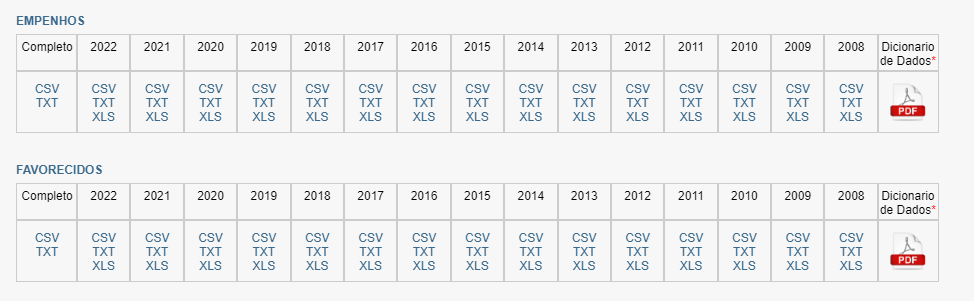


**CONTAS RIO – DADOS ABERTOS**<br>
Tipo de consulta:<br>
# **Empenhos**
**Conteúdo**: Apresentam informações detalhadas relativas a cada empenho realizado.
Observação: No formato “.xlsx”, os campos relativos a valores monetários são apresentados tendo o “.(ponto)” como separador de decimal. Para a realização de cálculos com estes campos, os mesmos devem ter o “.(ponto)” substituído pela “,(vírgula)”<br>
**Dicionário de dados - EMPENHOS - Campos que interessam:**<br>
2 - *Exercício do empenho*  - Ano de realização do empenho -  Texto<br>
3 - *Número do empenho* - Número do empenho - Texto<br>
4 - *Data do empenho* - Data de realização do empenho - Data<br>
11 - *Valor empenhado*  - Valor atualizado do empenho, ou seja, o valor original deduzido dos cancelamentos. - Número<br>
12 - *Valor liquidado* - Valor atualizado liquidado do empenho, ou seja, o(s) valor(es) originalmente liquidado(s) deduzido(s) do(s) cancelamento(s). - Número <br>
13 - *Valor pago* - Valor atualizado pago do empenho, ou seja, o(s) valor(es)  originalmente pagos (s) deduzido(s) do(s) cancelamento(s). - Número<br>



# **FAVORECIDOS**
As consultas, geradas em arquivos nos formatos “.txt” e “.xls”, apresentam informações relativas a cada liquidação realizada para o seu respectivo favorecido, tanto relativas a execução orçamentária quanto a execução de restos a pagar. O ano selecionado na tela de consulta refere-se ao exercício em que ocorreram as movimentações de liquidação e pagamento e respectivas anulações. Desta forma, uma mesma liquidação pode ser apresentada em consultas realizadas com anos diferentes, para os casos de execução de restos a pagar, quando a liquidação tenha ocorrido em um ano e o pagamento tenha ocorrido em anos posteriores.<BR>
No formato “.xlsx”, os campos relativos a valores monetários são apresentados tendo o “ . (ponto)“ como separador de decimal. Para a realização de cálculos com estes campos, os mesmos devem ter o “ . (ponto)” substituído pela “ , (vírgula)“. <BR><BR>
**CAMPOS QUE INTERESSAM:**<BR>
*Exercício do empenho* - Ano de realização do empenho - Texto<BR>
*Número do empenho* - Número do empenho - Texto<BR>
*Data da liquidação* - Data de realização da liquidação - Data<BR>
*Data do pagamento* - Data de realização do pagamento da liquidação - Data<BR>
*Número da liquidação* - Número da liquidação - Texto<BR>
*Vl liq* - Valor liquidado - Número<BR>
*Vl pago* - Valor pago - Número<BR>





**Arquivos baixados:**<br>
_arquivos_Open_Data_Empenhos_2022.csv<br>
_arquivos_Open_Data_Favorecidos_2022.csv



Conectar ao Google Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


Ler o arquivo de empenhos, pegando somente as colunas que interessam e renomeando com nomes mais curtos.

In [ ]:
# o comando read_csv abaixo contém algumas opções importantes
# sep = ';' informa que as colunas estão separadas por ponto e vírgula
# header = 0 informa que o cabeçalho que está no arquivo deve ser ignorado
# encoding = 'unicode_escape' permite a leitura de caracteres acentuados
# usecols define as colunas que desejo importar
# names informa os títulos que desejo atribuir a cada coluna lida

import pandas as pd
col_nomes = ['exer_emp','num_emp','dt_emp','val_emp','val_liq','val_pag']
df_emp = pd.read_csv('/content/drive/My Drive/dados/_arquivos_Open_Data_Empenhos_2022.csv',sep=';',header=0,encoding= 'unicode_escape',usecols=(2,3,4,11,12,13),names=col_nomes)
# converter a coluna data do empenho
df_emp['dt_emp'] = pd.to_datetime(df_emp['dt_emp'])
# alterar a formatação das colunas val_emp, val_liq e val_pag para o separador de decimais ser o ponto, para permitir a conversão de tipo
df_emp['val_emp'] = df_emp['val_emp'].apply(lambda x: str(x).replace(",","."))
df_emp['val_liq'] = df_emp['val_liq'].apply(lambda x: str(x).replace(",","."))
df_emp['val_pag'] = df_emp['val_pag'].apply(lambda x: str(x).replace(",","."))
# converter as colunas val_emp, val_liq e val_pag para valores numéricos
df_emp['val_emp'] = df_emp['val_emp'].astype('float')
df_emp['val_liq'] = df_emp['val_liq'].astype('float')
df_emp['val_pag'] = df_emp['val_pag'].astype('float')
print(df_emp.dtypes)
df_emp.head()

exer_emp             int64
num_emp              int64
dt_emp      datetime64[ns]
val_emp            float64
val_liq            float64
val_pag            float64
dtype: object


,exer_emp,num_emp,dt_emp,val_emp,val_liq,val_pag
0,2022,1,2022-02-01,250000.00,250000.00,250000.00
1,2022,2,2022-02-01,69997.65,69997.65,69997.65
2,2022,3,2022-03-01,1829752.66,884444.00,663333.00
3,2022,4,2022-03-01,2023867.00,1825083.06,1765083.06
4,2022,5,2022-03-01,400000.00,56449.90,53154.53


Ler o arquivo de FAVORECIDOS, pegando somente as colunas que interessam e renomeando com nomes mais curtos.

In [ ]:
col_nomes = ['exer_emp','num_emp','dt_liq','dt_pag','num_liq','val_liq','val_pag']
df_fav = pd.read_csv('/content/drive/My Drive/dados/_arquivos_Open_Data_Favorecidos_2022.csv',sep=',',header=0,encoding= 'unicode_escape',usecols=(2,3,8,9,10,11,15),names=col_nomes)
# alterar a formatação das colunas val_liq e val_pag para o separador de decimais ser o ponto, para permitir a conversão de tipo
df_fav['val_liq'] = df_fav['val_liq'].apply(lambda x: str(x).replace(",","."))
df_fav['val_pag'] = df_fav['val_pag'].apply(lambda x: str(x).replace(",","."))
# converter as colunas val_liq e val_pag para valores numéricos
df_fav['val_liq'] = df_fav['val_liq'].astype('float')
df_fav['val_pag'] = df_fav['val_pag'].astype('float')
# converter as colunas de data
df_fav['dt_liq'] = pd.to_datetime(df_fav['dt_liq'])
df_fav['dt_pag'] = pd.to_datetime(df_fav['dt_pag'])
print(df_fav.dtypes)
df_fav.head()

exer_emp             int64
num_emp              int64
dt_liq      datetime64[ns]
dt_pag      datetime64[ns]
num_liq              int64
val_liq            float64
val_pag            float64
dtype: object


,exer_emp,num_emp,dt_liq,dt_pag,num_liq,val_liq,val_pag
0,2021,3,2021-12-29,2022-01-31,26,1012297.60,1012297.60
1,2021,3,2022-03-01,2022-02-03,27,97000.00,97000.00
2,2021,47,2021-12-17,2022-10-01,43,15598.65,15598.65
3,2021,47,2021-12-28,2022-01-31,44,63149.04,63149.04
4,2021,47,2021-12-28,2022-01-31,45,28333.03,28333.03


In [ ]:
# juntar os dois dataframes pela coluna num_emp
junta = pd.merge(df_emp,df_fav,how='inner',on='num_emp')
# pegar colunas: exer_emp_x, num_emp, dt_emp, val_emp, dt_liq, dt_pag, val_pag_y
tabela=junta[["exer_emp_x","num_emp","dt_emp","val_emp","dt_liq","dt_pag","val_pag_y"]]
print(tabela.dtypes)
tabela


exer_emp_x             int64
num_emp                int64
dt_emp        datetime64[ns]
val_emp              float64
dt_liq        datetime64[ns]
dt_pag        datetime64[ns]
val_pag_y            float64
dtype: object


,exer_emp_x,num_emp,dt_emp,val_emp,dt_liq,dt_pag,val_pag_y
0,2022,1,2022-02-01,250000.0,2022-02-03,NaT,0.00
1,2022,1,2022-02-01,250000.0,2022-02-03,2022-11-04,250000.00
2,2022,1,2022-02-01,250000.0,2022-02-01,2022-02-18,2628.41
3,2022,1,2022-02-01,250000.0,2022-02-28,2022-03-18,7801.58
4,2022,1,2022-02-01,250000.0,2022-01-03,2022-04-18,8640.03
...,...,...,...,...,...,...,...
3435505,2022,1459,2022-06-04,12640.0,2021-12-29,2022-01-31,5203.98
3435506,2022,1459,2022-06-04,12640.0,2022-02-03,2022-03-30,3922.72
3435507,2022,1459,2022-06-04,12640.0,2022-01-04,NaT,0.00
3435508,2022,1459,2022-06-04,12640.0,2022-04-25,NaT,0.00


In [ ]:
# calcular a diferença de dias entre dt_pag e dt_liq
dif_dt_liq_dt_emp = tabela['dt_liq'] - tabela['dt_emp']
dif_dt_liq_dt_emp.head()
# insere uma coluna com estes cálculos de diferença de dias na tabela
tabela.insert(7, "df_dt_liq_emp",dif_dt_liq_dt_emp , allow_duplicates=True)
tabela.head()

,exer_emp_x,num_emp,dt_emp,val_emp,dt_liq,dt_pag,val_pag_y,df_dt_liq_emp,dif_dt_liq_emp
0,2022,1,2022-02-01,250000.0,2022-02-03,NaT,0.00,2 days,2 days
1,2022,1,2022-02-01,250000.0,2022-02-03,2022-11-04,250000.00,2 days,2 days
2,2022,1,2022-02-01,250000.0,2022-02-01,2022-02-18,2628.41,0 days,0 days
3,2022,1,2022-02-01,250000.0,2022-02-28,2022-03-18,7801.58,27 days,27 days
4,2022,1,2022-02-01,250000.0,2022-01-03,2022-04-18,8640.03,-29 days,-29 days


In [ ]:
# calcular a diferença de dias entre dt_liq e dt_emp